<a href="https://colab.research.google.com/github/MarriRohan/Reinforcement-Learning-2025/blob/main/Lab_01.mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computed Value Function V(s):
['42.61', '48.46', '54.95', '62.17', '70.19']
['48.46', '54.95', '62.17', '70.19', '79.10']
['46.85', '53.17', '70.19', '79.10', '89.00']
['62.17', '70.19', '79.10', '89.00', '100.00']
['70.19', '79.10', '89.00', '100.00', '100.00']


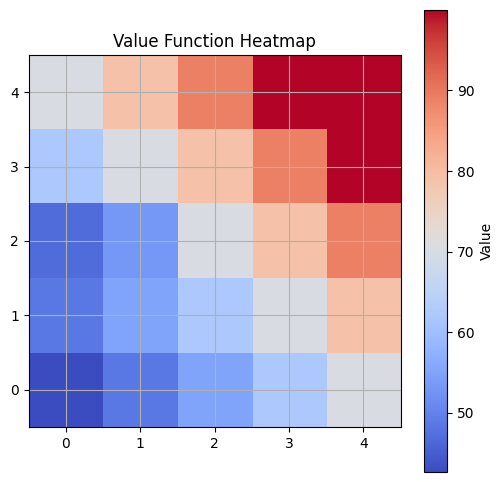

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# GridWorld parameters
N = 5  # Grid size
gamma = 0.9  # Discount factor
goal = (4, 4)
pit = (2, 2)

# Initialize value function
V = np.zeros((N, N))

# Define reward function
def reward(state):
    if state == goal:
        return 10
    elif state == pit:
        return -10
    else:
        return -1

# Define deterministic policy: Right if possible, else Down
def next_state(state):
    x, y = state
    if y < N - 1:
        return (x, y + 1)
    elif x < N - 1:
        return (x + 1, y)
    else:
        return (x, y)  # Terminal state

# Value iteration under fixed policy
def compute_value_function(V, gamma, threshold=1e-4):
    while True:
        delta = 0
        for x in range(N):
            for y in range(N):
                s = (x, y)
                s_prime = next_state(s)
                r = reward(s_prime)
                v_new = r + gamma * V[s_prime]
                delta = max(delta, abs(v_new - V[s]))
                V[s] = v_new
        if delta < threshold:
            break
    return V

# Run value function computation
V = compute_value_function(V, gamma)

# Display value function
print("Computed Value Function V(s):")
for row in V:
    print(["{0:.2f}".format(val) for val in row])

# Visualize value function
plt.figure(figsize=(6, 6))
plt.imshow(V, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Value')
plt.title('Value Function Heatmap')
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [ ]:
# Simple MDP definition
states = ['s0', 's1', 's2']
actions = ['a0', 'a1']
terminal_state = 's2'

# Transition model: P[state][action] = list of (prob, next_state, reward)
P = {
    's0': {
        'a0': [(1.0, 's1', 5)],
        'a1': [(1.0, 's2', 10)]
    },
    's1': {
        'a0': [(1.0, 's0', -1)],
        'a1': [(1.0, 's2', 2)]
    },
    's2': {
        'a0': [(1.0, 's2', 0)],
        'a1': [(1.0, 's2', 0)]
    }
}

gamma = 0.9
theta = 0.001

# ------------------ Value Iteration ------------------
def value_iteration(P, states, actions, gamma=0.9, theta=0.001):
    V = {s: 0 for s in states}
    policy = {s: actions[0] for s in states}

    while True:
        delta = 0
        for s in states:
            if s == terminal_state:
                continue
            action_values = []
            for a in actions:
                value = sum([prob * (reward + gamma * V[next_state])
                             for prob, next_state, reward in P[s][a]])
                action_values.append((value, a))
            max_value, best_action = max(action_values)
            delta = max(delta, abs(V[s] - max_value))
            V[s] = max_value
            policy[s] = best_action
        if delta < theta:
            break
    return policy, V

# ------------------ Policy Iteration ------------------
def policy_evaluation(policy, P, states, gamma=0.9, theta=0.001):
    V = {s: 0 for s in states}
    while True:
        delta = 0
        for s in states:
            if s == terminal_state:
                continue
            a = policy[s]
            v = sum([prob * (reward + gamma * V[next_state])
                     for prob, next_state, reward in P[s][a]])
            delta = max(delta, abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return V

def policy_iteration(P, states, actions, gamma=0.9, theta=0.001):
    policy = {s: actions[0] for s in states}
    while True:
        V = policy_evaluation(policy, P, states, gamma, theta)
        policy_stable = True
        for s in states:
            if s == terminal_state:
                continue
            old_action = policy[s]
            action_values = {
                a: sum([prob * (reward + gamma * V[next_state])
                        for prob, next_state, reward in P[s][a]])
                for a in actions
            }
            best_action = max(action_values, key=action_values.get)
            policy[s] = best_action
            if old_action != best_action:
                policy_stable = False
        if policy_stable:
            break
    return policy, V

# ------------------ Run Both Algorithms ------------------
if __name__ == "__main__":
    print("🔁 Value Iteration:")
    vi_policy, vi_values = value_iteration(P, states, actions)
    print("Policy:", vi_policy)
    print("Values:", vi_values)

    print("\n🔁 Policy Iteration:")
    pi_policy, pi_values = policy_iteration(P, states, actions)
    print("Policy:", pi_policy)
    print("Values:", pi_values)


🔁 Value Iteration:
Policy: {'s0': 'a0', 's1': 'a0', 's2': 'a0'}
Values: {'s0': 21.575091698945428, 's1': 18.417582529050886, 's2': 0}

🔁 Policy Iteration:
Policy: {'s0': 'a0', 's1': 'a0', 's2': 'a0'}
Values: {'s0': 21.575325291175456, 's1': 18.41779276205791, 's2': 0}


In [ ]:
# Define the states of the MDP. In this case, representing different levels of solar power availability.
# Increased to 5 states
states = ["Very Low Solar", "Low Solar", "Medium Solar", "High Solar", "Very High Solar"]

# Define the actions the agent can take in each state.
actions = ["Activate Generator", "Do Not Activate Generator"]

# Define transition probabilities (conceptual example).
# This is a dictionary where:
# - The first level key is the current state (s).
# - The second level key is the action taken (a).
# - The third level key is the next state (s').
# - The value is the probability of transitioning from s to s' given action a (P(s'|s,a)).
# These probabilities would ideally be derived from historical data or a system model.
# *** NOTE: You will need to fill in the specific probabilities for the new states
# and adjust existing ones as needed for your 5-state model. ***
transition_probabilities = {
    "Very Low Solar": {
        "Activate Generator": {
            "Very Low Solar": 0.6, "Low Solar": 0.3, "Medium Solar": 0.1, "High Solar": 0.0, "Very High Solar": 0.0
        },
        "Do Not Activate Generator": {
            "Very Low Solar": 0.7, "Low Solar": 0.2, "Medium Solar": 0.1, "High Solar": 0.0, "Very High Solar": 0.0
        }
    },
    "Low Solar": {
        "Activate Generator": {
            "Very Low Solar": 0.1, "Low Solar": 0.5, "Medium Solar": 0.3, "High Solar": 0.1, "Very High Solar": 0.0
        },
        "Do Not Activate Generator": {
            "Very Low Solar": 0.1, "Low Solar": 0.6, "Medium Solar": 0.2, "High Solar": 0.1, "Very High Solar": 0.0
        }
    },
    "Medium Solar": {
        "Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.2, "Medium Solar": 0.6, "High Solar": 0.2, "Very High Solar": 0.0
        },
        "Do Not Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.3, "Medium Solar": 0.5, "High Solar": 0.2, "Very High Solar": 0.0
        }
    },
    "High Solar": {
        "Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.1, "Medium Solar": 0.3, "High Solar": 0.5, "Very High Solar": 0.1
        },
        "Do Not Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.05, "Medium Solar": 0.15, "High Solar": 0.6, "Very High Solar": 0.2
        }
    },
    "Very High Solar": {
        "Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.0, "Medium Solar": 0.1, "High Solar": 0.3, "Very High Solar": 0.6
        },
        "Do Not Activate Generator": {
            "Very Low Solar": 0.0, "Low Solar": 0.0, "Medium Solar": 0.05, "High Solar": 0.15, "Very High Solar": 0.8
        }
    }
}

# Define the reward function (conceptual example).
# This is a dictionary where:
# - The first level key is the current state (s).
# - The second level key is the action taken (a).
# - The third level key is the next state (s').
# - The value is the immediate reward received when taking action a in state s and transitioning to state s' (R(s,a,s')).
# The rewards are defined to incentivize meeting demand efficiently.
# Assuming High Solar and Very High Solar meet demand alone (+10 reward when generator is off).
# Medium Solar might sometimes meet demand (+5 reward when generator is off), Low/Very Low do not (-5 penalty when generator is off).
# Activating the generator always meets demand (+5 reward), regardless of solar state.
# *** NOTE: You will need to fill in the specific reward values for the new states
# and adjust existing ones as needed for your 5-state model. ***
reward_function = {
    "Very Low Solar": {
        "Activate Generator": {s_prime: 5 for s_prime in states}, # Generator active, meets demand
        "Do Not Activate Generator": {s_prime: -5 for s_prime in states} # No generator, likely unmet demand
    },
    "Low Solar": {
        "Activate Generator": {s_prime: 5 for s_prime in states}, # Generator active, meets demand
        "Do Not Activate Generator": {s_prime: -5 for s_prime in states} # No generator, likely unmet demand
    },
    "Medium Solar": {
        "Activate Generator": {s_prime: 5 for s_prime in states}, # Generator active, meets demand
        "Do Not Activate Generator": {
             "Very Low Solar": -5, "Low Solar": -5, "Medium Solar": 5, "High Solar": 10, "Very High Solar": 10
        } # Medium might meet demand sometimes, High/Very High do
    },
    "High Solar": {
        "Activate Generator": {s_prime: 5 for s_prime in states}, # Generator active, meets demand
        "Do Not Activate Generator": {s_prime: 10 for s_prime in states} # High solar meets demand
    },
    "Very High Solar": {
        "Activate Generator": {s_prime: 5 for s_prime in states}, # Generator active, meets demand
        "Do Not Activate Generator": {s_prime: 10 for s_prime in states} # Very High solar meets demand
    }
}

# Define the discount factor (gamma).
# This value (between 0 and 1) determines the present value of future rewards.
# A higher discount factor means future rewards are considered more important.
discount_factor = 0.9